In [2]:
import pandas as pd
from qiime2 import Artifact, Metadata, Visualization
import numpy as np
import qupid
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from scipy.stats import kruskal

## Load Metadata

In [4]:
asd_md = pd.read_csv("qiita/15350_20240110-175840.txt", sep='\t', index_col=0)
asd_md.drop(asd_md[asd_md.index.str.contains("BLANK")].index, inplace=True) # drop blanks
faith_pd = Artifact.load('out/rarefaction_500000/faith_pd_vector.qza')

In [5]:
asd_md['ados_cosototrrtot'] = asd_md['ados_cosototrrtot'].astype(int)
asd_md['ados_cosotot'] = asd_md['ados_cosotot'].astype(int)
asd_md['ados_rrtot'] = asd_md['ados_rrtot'].astype(int)

In [6]:
asd_md['ados_cosototrrtot'].value_counts().sort_index()

0     2
1     1
2     2
3     6
4     2
5     3
7     3
8     3
11    4
12    1
13    1
14    3
15    1
18    4
19    2
20    4
21    5
22    2
23    3
24    9
25    5
26    5
27    4
28    8
Name: ados_cosototrrtot, dtype: int64

In [7]:
asd_md.head()
asd_md.to_csv('data/metadata/Metadata.tsv', sep='\t', index =True)

In [8]:
metadata = pd.read_table("data/metadata/Metadata.tsv", sep="\t", index_col=0)

In [9]:
print(metadata.shape)
metadata

(83, 91)


,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
sample_name,,,,,,,,,,,,,,,,,,,,,
15350.A5U7C.2,8,14,6,35,X00235506,0,0.0,1,2023-02-08,2023-02-08,...,male,408170,Pierce ASD project,363146269,82,74,78,100,103,92026.0
15350.A6N5R.1,12,18,6,16,X00235660,0,0.0,1,2022-06-28,2022-06-28,...,male,408170,Pierce ASD project,363146304,95,96,95,102,99,92154.0
15350.A6T5B.1,1,2,1,14,X00235600,0,1.0,1,2022-04-18,2022-04-18,...,male,408170,Pierce ASD project,363146249,98,94,100,114,101,92102.0
15350.A7B7Z.1,20,27,7,24,X00235539,1,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146321,64,54,69,69,65,91950.0
15350.A7L6P.1,20,28,8,27,X00235658,0,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146256,74,60,92,89,75,91910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350.C6Z3P.1,8,11,3,25,X00235753,0,0.0,1,2023-08-15,2023-08-15,...,female,408170,Pierce ASD project,363146274,76,54,92,89,86,91942.0
15350.C7T8B.1,9,14,5,34,X00235652,0,1.0,1,2023-10-13,2023-10-13,...,female,408170,Pierce ASD project,363146315,66,67,69,69,61,92111.0
15350.C7V5J.1,11,15,4,20,X00235548,0,0.0,1,2023-10-12,2023-10-12,...,male,408170,Pierce ASD project,363146252,94,92,95,95,101,92122.0


In [10]:
asd_fpd = asd_md.join(faith_pd.view(pd.Series))
asd_fpd.to_csv('data/metadata/Metadata_and_Alpha.tsv', sep='\t', index =True)
faith_pd = pd.read_table("data/metadata//Metadata_and_Alpha.tsv", sep="\t", index_col=0)

# Exploring Metadata

## ADOS

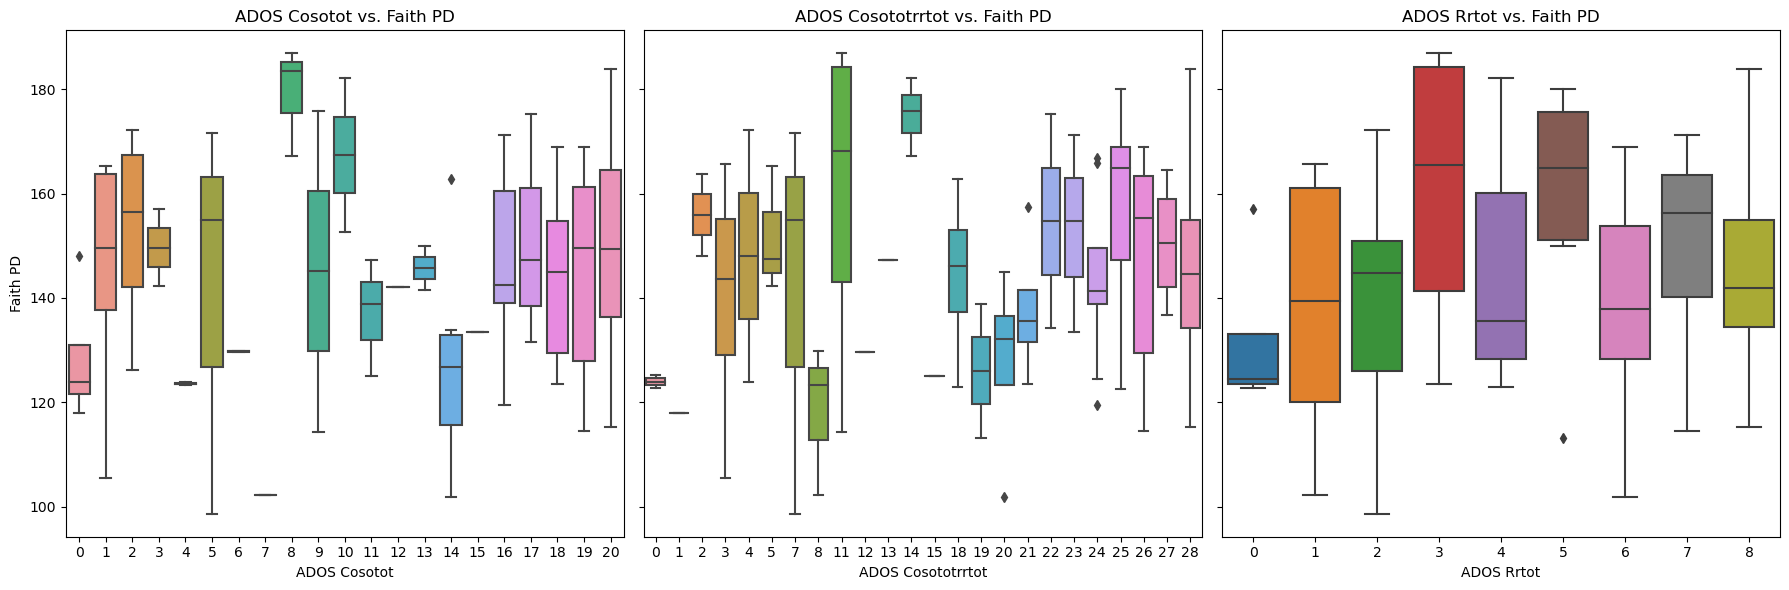

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each of the ADOS measures against faith_pd in its own subplot
sns.boxplot(x='ados_cosotot', y='faith_pd', data=faith_pd, ax=axes[0])
axes[0].set_title('ADOS Cosotot vs. Faith PD')
axes[0].set_xlabel('ADOS Cosotot')
axes[0].set_ylabel('Faith PD')

sns.boxplot(x='ados_cosototrrtot', y='faith_pd', data=faith_pd, ax=axes[1])
axes[1].set_title('ADOS Cosototrrtot vs. Faith PD')
axes[1].set_xlabel('ADOS Cosototrrtot')
axes[1].set_ylabel('')

sns.boxplot(x='ados_rrtot', y='faith_pd', data=faith_pd, ax=axes[2])
axes[2].set_title('ADOS Rrtot vs. Faith PD')
axes[2].set_xlabel('ADOS Rrtot')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

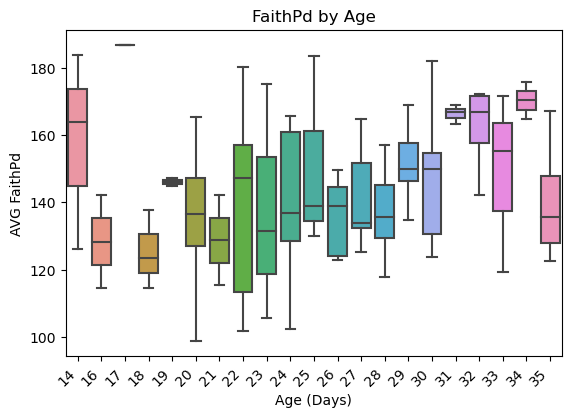

In [10]:
mean_values = fpd.groupby('host_age')['faith_pd'].mean()
mean_df = pd.DataFrame({'host_age': mean_values.index, 'mean_value': mean_values.values})
sns.boxplot(x='host_age', y='faith_pd', data = fpd)
plt.title('FaithPd by Age')
plt.xlabel('Age (Days)')
plt.ylabel('AVG FaithPd')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.show()

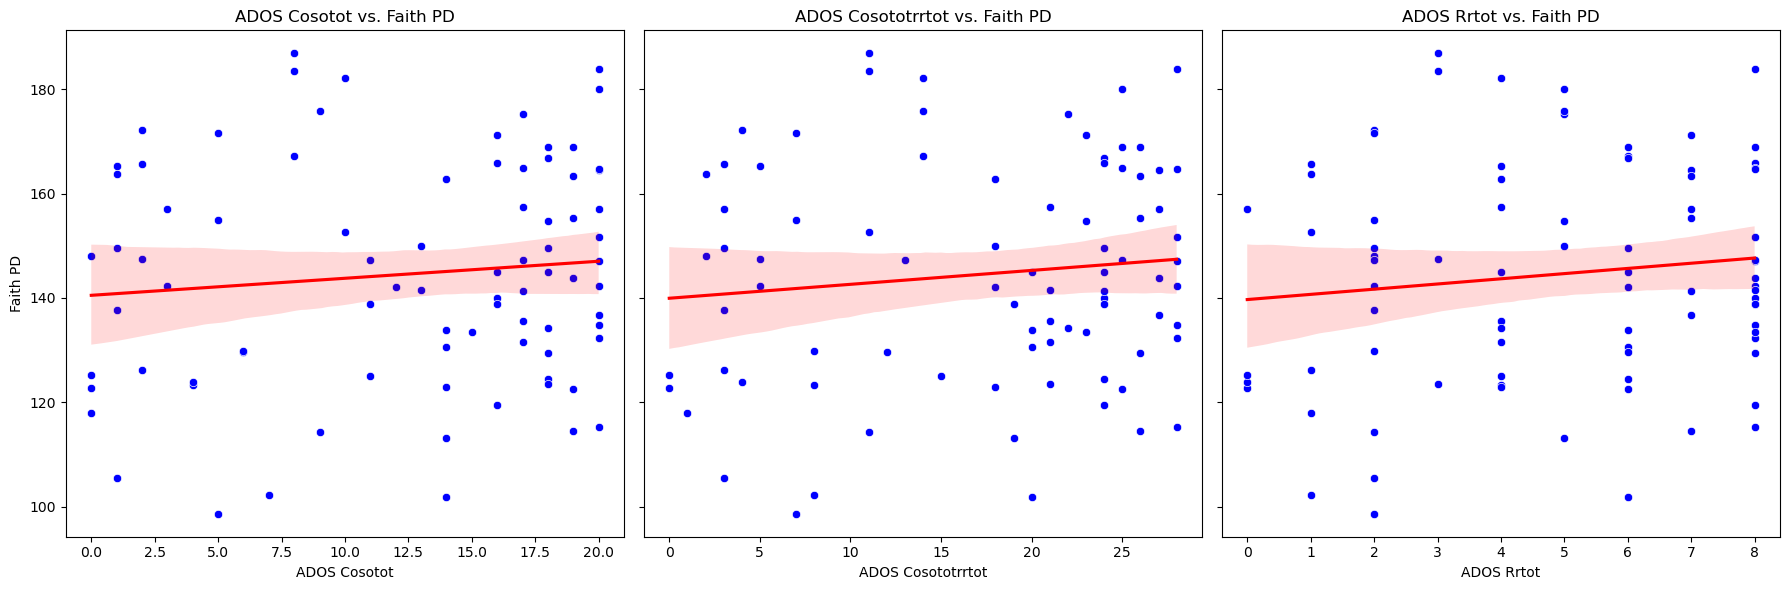

In [13]:
# do not use-- not great blot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.scatterplot(x='ados_cosotot', y='faith_pd', data=faith_pd, ax=axes[0], color='blue')
sns.regplot(x='ados_cosotot', y='faith_pd', data=faith_pd, ax=axes[0], scatter=False, color='red')
axes[0].set_title('ADOS Cosotot vs. Faith PD')
axes[0].set_xlabel('ADOS Cosotot')
axes[0].set_ylabel('Faith PD')

sns.scatterplot(x='ados_cosototrrtot', y='faith_pd', data=faith_pd, ax=axes[1], color='blue')
sns.regplot(x='ados_cosototrrtot', y='faith_pd', data=faith_pd, ax=axes[1], scatter=False, color='red')
axes[1].set_title('ADOS Cosototrrtot vs. Faith PD')
axes[1].set_xlabel('ADOS Cosototrrtot')
axes[1].set_ylabel('')

sns.scatterplot(x='ados_rrtot', y='faith_pd', data=faith_pd, ax=axes[2], color='blue')
sns.regplot(x='ados_rrtot', y='faith_pd', data=faith_pd, ax=axes[2], scatter=False, color='red')
axes[2].set_title('ADOS Rrtot vs. Faith PD')
axes[2].set_xlabel('ADOS Rrtot')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

## Eye tracking

In [14]:
# Fixing the line to identify columns containing 'mtr'
columns_containing_mtr = [col for col in faith_pd.columns if 'mtr' in col]

print(list(faith_pd.columns))
# Printing the DataFrame with only those columns
faith_pd[columns_containing_mtr]

['ados_cosotot', 'ados_cosototrrtot', 'ados_rrtot', 'ageatfecalsample', 'anonymized_name', 'antibiotics_last_2weeks', 'attend_daycare', 'breastfed_morethan1month', 'collection_date', 'collection_timestamp', 'complexsocial_percentfixationsocial', 'complexsocial_truepositive', 'constipation_2wk', 'country', 'csectionbirth', 'currently_breastfeeding', 'dateoffecalsampleused', 'description', 'diarrhea_2wk', 'dna_extracted', 'dx', 'dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay', 'elevation', 'empo_1', 'empo_2', 'empo_3', 'empo_4', 'env_biome', 'env_feature', 'env_material', 'env_package', 'ethnicity', 'evergiven_formula', 'foodvarietyscore', 'gender', 'geo_loc_name', 'geopref_percentfixationsocial', 'geopref_truepositive', 'gestationalagebirth', 'host_age', 'host_age_units', 'host_body_habitat', 'host_body_mass_index', 'host_body_product', 'host_body_site', 'host_common_name', 'host_height', 'host_height_units', 'host_life_stage', 'host_scientific_name', 'ho

,dx_mtrtechno,dx_mtrtraffic,mtrtechno_percentfixationmotherese,mtrtechno_truepositive,mtrtraffic_percentfixationmotherese,mtrtraffic_truepositive,vine_mtrtotal_domstd
sample_name,,,,,,,
15350.A5U7C.2,ASD,NaN,89.516663,0.0,NaN,NaN,100
15350.A6N5R.1,TP,NaN,18.845566,1.0,NaN,NaN,102
15350.A6T5B.1,NaN,NaN,NaN,NaN,NaN,NaN,114
15350.A7B7Z.1,TP,TP,14.752641,1.0,24.824900,1.0,69
15350.A7L6P.1,TP,TP,3.286289,1.0,15.864428,1.0,89
...,...,...,...,...,...,...,...
15350.C6Z3P.1,ASD,NaN,99.596146,0.0,NaN,NaN,89
15350.C7T8B.1,ASD,ASD,78.593817,0.0,75.058492,0.0,69
15350.C7V5J.1,ASD,ASD,79.763376,0.0,58.745013,0.0,95


In [15]:
# Creating a df that indicates whether the sample is TP in on or more of the eye-tracking metrics.(cumulative-Eye-Tracking-TP)
dx_eyetrack = pd.DataFrame(index=metadata.index)

dx_eyetrack['dx_eyetrack'] = metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 1 if 'TP' in x.values else 0, axis=1)

dx_eyetrack.to_csv('data/metadata/Dx_Eyetrack.tsv', sep='\t', index =True)
dx_eyetrack['dx_eyetrack'].value_counts()

# Joining the dx_eyetrack DataFrame with the faith_pd DataFrame
metadata_and_eyetrack = metadata.join(dx_eyetrack)
metadata_and_eyetrack.head()
metadata_and_eyetrack.to_csv('data/metadata/Metadata_and_dx_Eyetrack.tsv', sep='\t', index =True)


## Explore controls

In [16]:
agp_md = pd.read_csv("tmi/results/current/human-gut/WGS/10317/raw.txt", sep='\t', index_col=0)

/var/folders/tx/vgccmrkj1fz1zv99j496_3k80000gn/T/ipykernel_2190/3456687087.py:1: DtypeWarning: Columns (6,14,100,101,107,156,158,168,171,201,216,229,294,295,303,330,383,395,422,432,443,454,469,500,502,525,526,550,567,574,578,588,622,649,704,705,711,714,739,746,756,757,791,796,798,857,894) have mixed types. Specify dtype option on import or set low_memory=False.
  agp_md = pd.read_csv("tmi/results/current/human-gut/WGS/10317/raw.txt", sep='\t', index_col=0)


In [17]:
agp_md[agp_md['asd'] == "Diagnosed by a medical professional (doctor, physician assistant)"]['host_age']

#SampleID
10317.X00179681    33.9
10317.000108221    10.9
10317.000066756    20.4
10317.000101349    11.5
10317.000039878    23.5
10317.000101273    13.0
10317.000154985    58.9
10317.000101359     6.0
10317.000101197    14.0
10317.000101383    12.2
10317.000108370    19.5
10317.000101162     2.3
10317.000101172     3.6
10317.X00179111    28.3
10317.000101200     9.1
10317.000101392    24.4
10317.000102791    12.7
10317.000065445    26.3
10317.X00192615    33.6
10317.000108204    16.4
10317.000062145     6.4
10317.000054191    14.4
10317.000101237    12.4
10317.000101165    15.1
10317.000065893    25.3
10317.000101244    13.2
10317.000101386     9.5
10317.000108266    17.7
10317.000101181    13.0
10317.X00179722     7.5
10317.000101396    39.1
10317.000067637    24.5
10317.000101368    30.4
10317.000101195     7.8
10317.X00215612    21.7
10317.X00179407     9.2
10317.000065978    30.3
10317.000101291     3.9
10317.000101248    19.3
10317.000101239     9.3
10317.000101382     7.7
Name: 

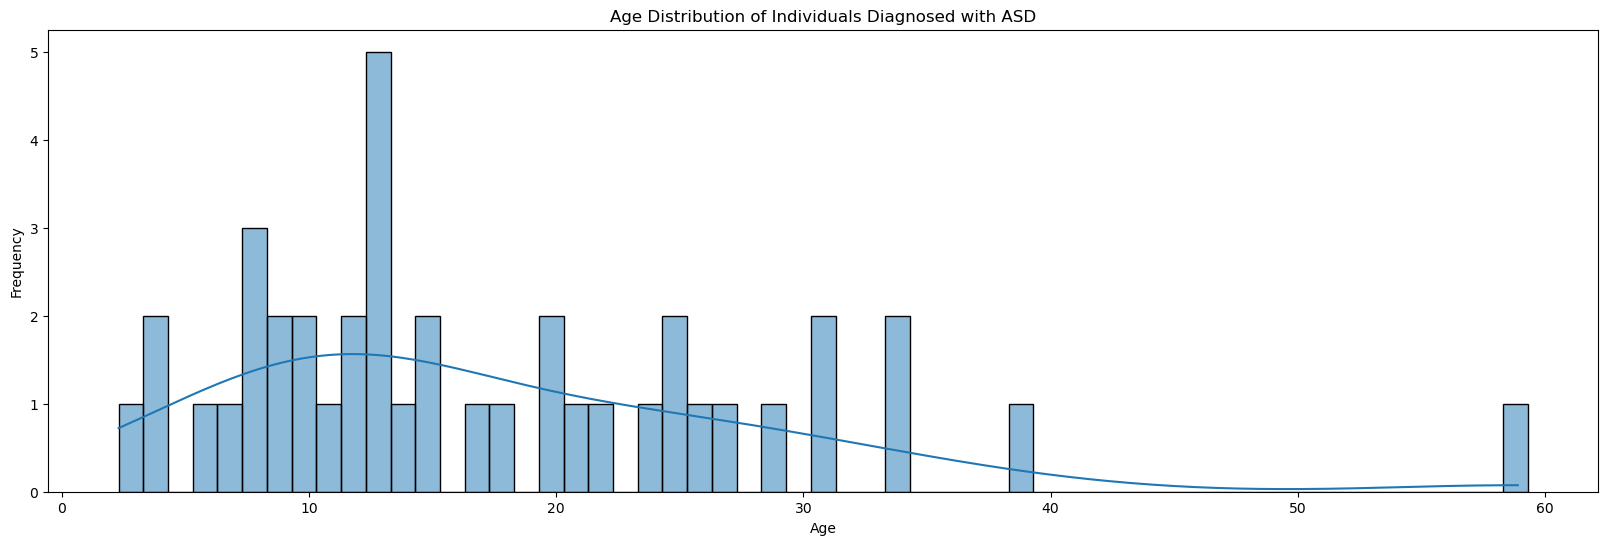

In [18]:
plt.figure(figsize=(20, 6))  # For example, 10 inches wide by 6 inches tall

# Filter data for individuals diagnosed by a medical professional
diagnosed_ages = agp_md[agp_md['asd'] == "Diagnosed by a medical professional (doctor, physician assistant)"]['host_age'].astype(float)

# Plot histogram of ages using seaborn
sns.histplot(diagnosed_ages, kde=True, binwidth=1)

# Adding title and labels for clarity
plt.title('Age Distribution of Individuals Diagnosed with ASD')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Creating Plots
Goal is to characterize metadata

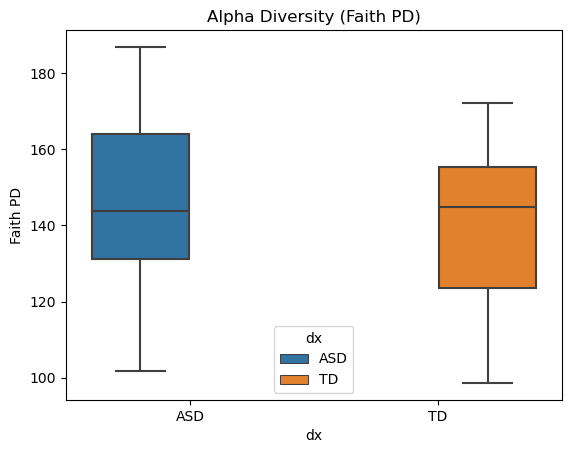

In [19]:
# Assuming 'faith_pd' is a column in asd_md representing alpha diversity
sns.boxplot(x='dx', y='faith_pd', data=faith_pd, hue='dx')

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.show()

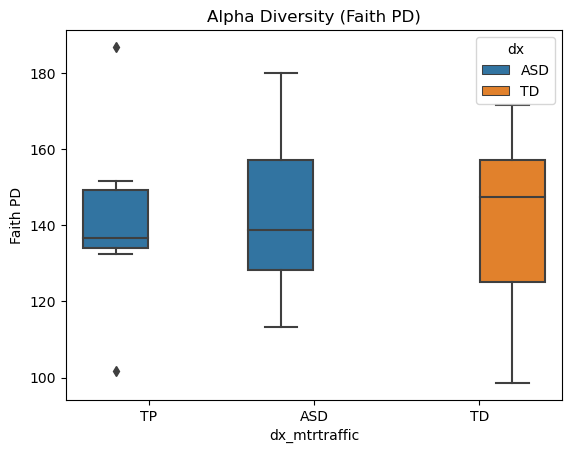

In [20]:
# Assuming 'faith_pd' is a column in asd_md representing alpha diversity
sns.boxplot(x='dx_mtrtraffic', y='faith_pd', data=faith_pd, hue='dx')

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.show()

In [21]:
asd_str = "ASD"
no_asd_str = "TD"
asd = metadata.query("dx == @asd_str")
td = metadata.query("dx == @no_asd_str")
num_asd = asd['dx'].value_counts()
num_control = td['dx'].value_counts()
metadata['dx'].value_counts()
print("Number of", num_asd)
print("Number of", num_control)

Number of ASD    63
Name: dx, dtype: int64
Number of TD    20
Name: dx, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


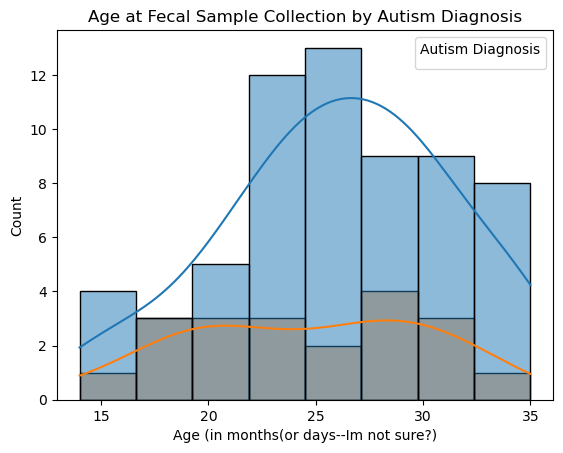

In [22]:
sns.histplot(data=metadata, x='ageatfecalsample', hue='dx', kde=True)
plt.title('Age at Fecal Sample Collection by Autism Diagnosis')
plt.xlabel('Age (in months(or days--Im not sure?)')
plt.ylabel('Count')
plt.legend(title='Autism Diagnosis')
plt.show()

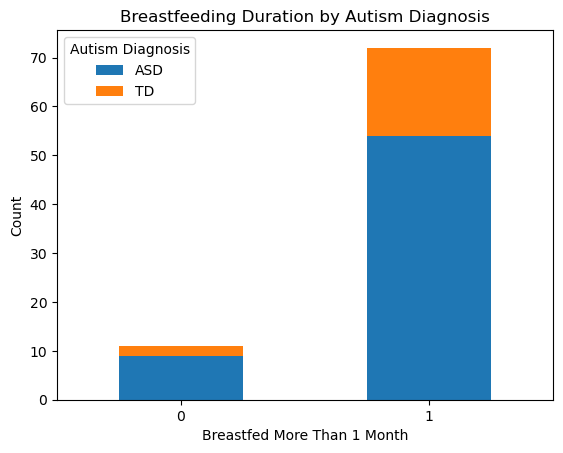

In [23]:
breastfed_counts = pd.crosstab(metadata['breastfed_morethan1month'], metadata['dx'])
breastfed_counts.plot(kind='bar', stacked=True)
plt.title('Breastfeeding Duration by Autism Diagnosis')
plt.xlabel('Breastfed More Than 1 Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Autism Diagnosis')
plt.show()

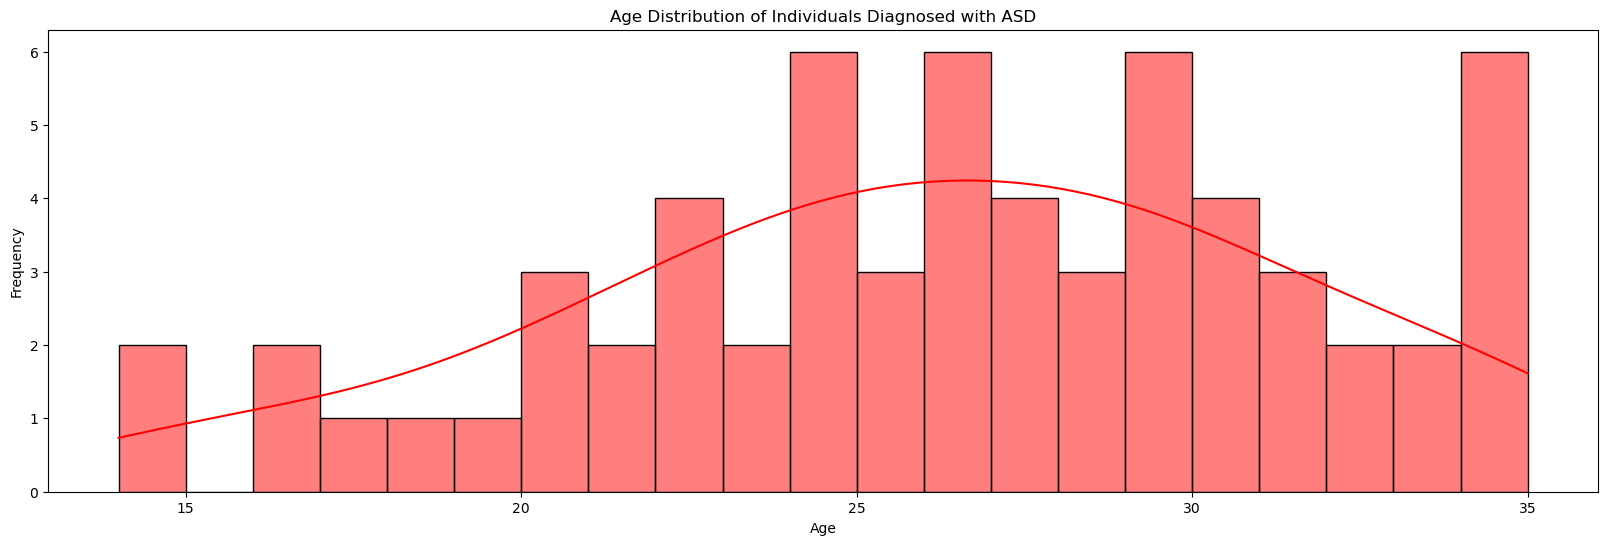

In [33]:
plt.figure(figsize=(20, 6))

diagnosed_ages = metadata[metadata['dx'] == "ASD"]['host_age'].astype(float)

sns.histplot(diagnosed_ages, kde=True, binwidth=1, color = 'red')

plt.title('Age Distribution of Individuals Diagnosed with ASD')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

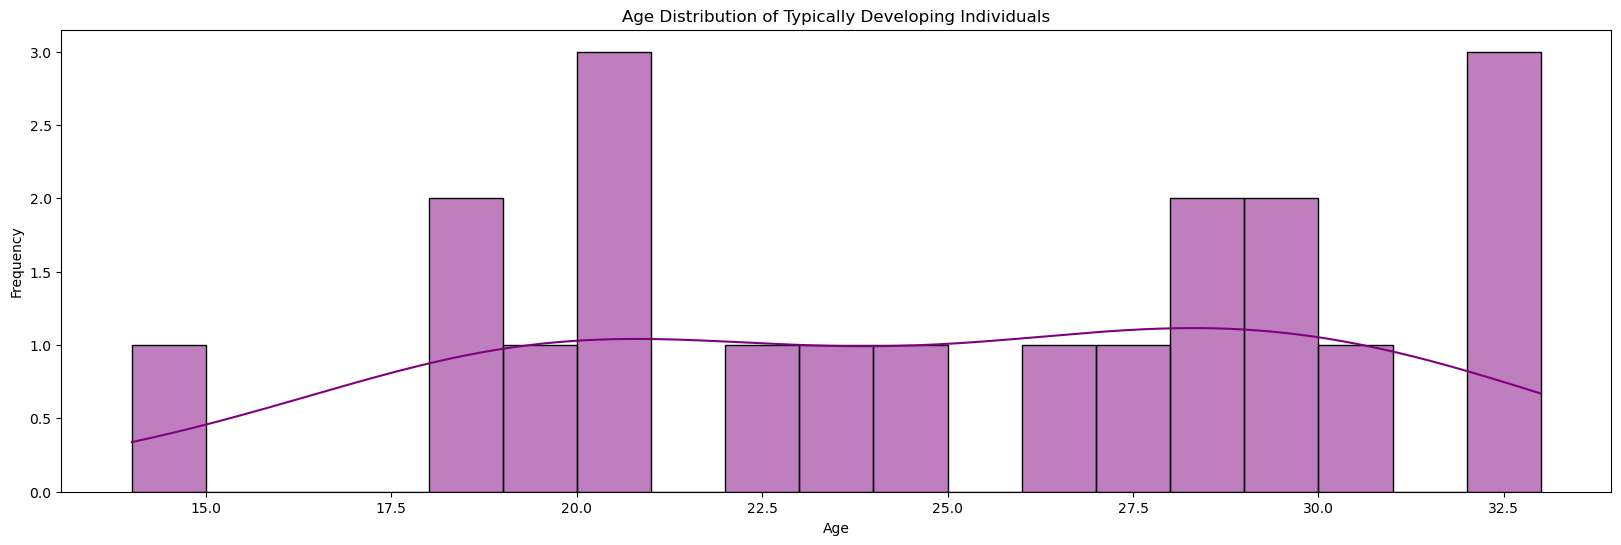

In [34]:
plt.figure(figsize=(20, 6))

diagnosed_ages = metadata[metadata['dx'] == "TD"]['host_age'].astype(float)

sns.histplot(diagnosed_ages, kde=True, binwidth=1, color = 'purple')

plt.title('Age Distribution of Typically Developing Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [35]:
metadata['dx'].value_counts()
metadata = pd.read_csv('data/metadata/Metadata_Final.tsv', sep='\t')


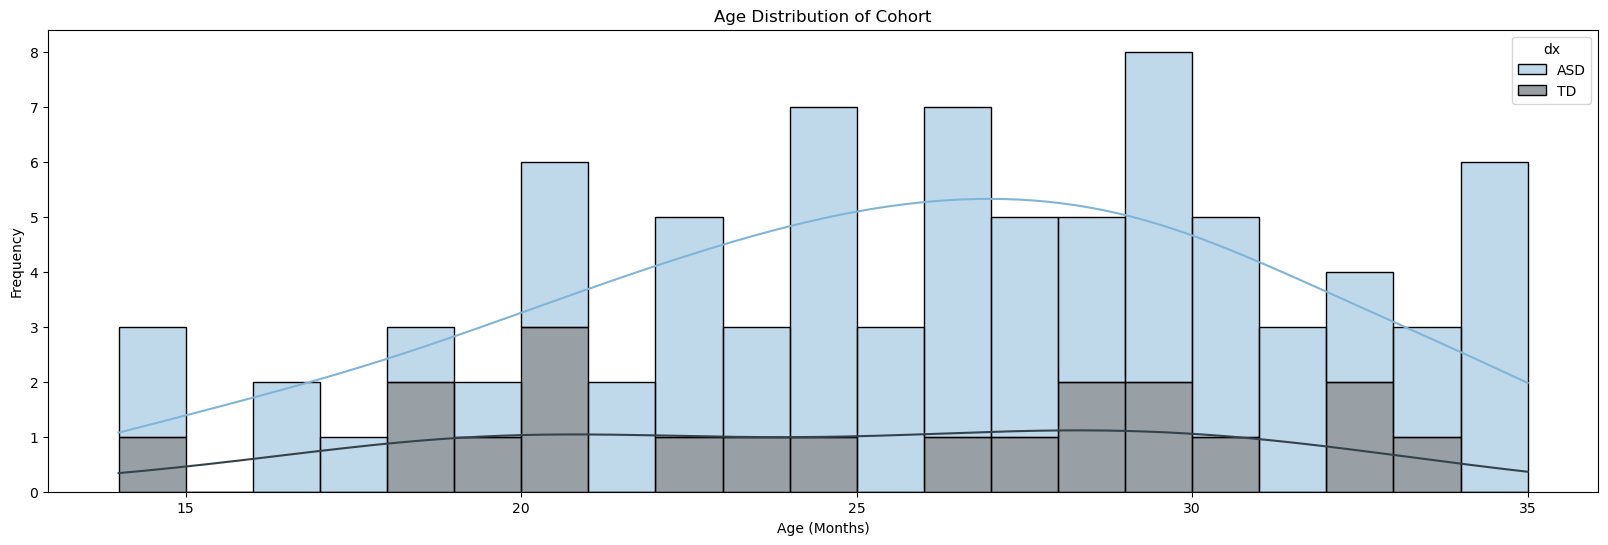

In [36]:
plt.figure(figsize=(20, 6))

color_palette = sns.color_palette(palette='Blues_d', n_colors=10)
color_palette = [color_palette[1], color_palette[9]]

sns.histplot(data=metadata, x='host_age', hue='dx', kde=True, binwidth=1, multiple='stack', palette=color_palette)

plt.title('Age Distribution of Cohort')
plt.xlabel('Age (Months)')
plt.ylabel('Frequency')

plt.savefig('out/age_dist.png', dpi = 600)
plt.show()

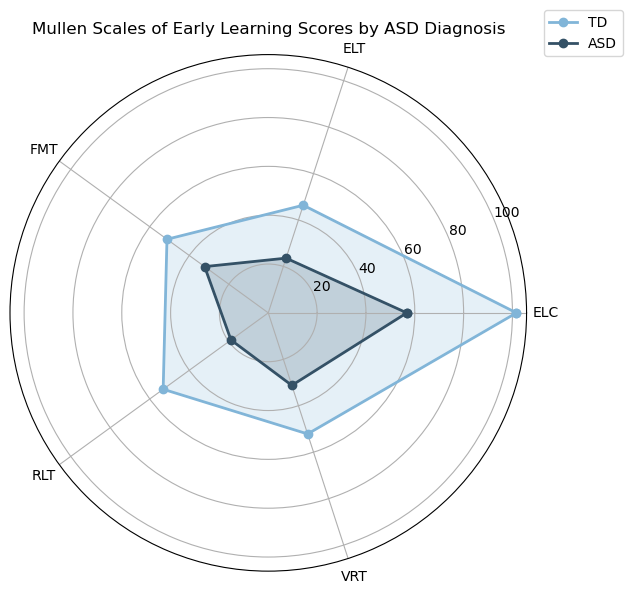

In [39]:
categories = ['ELC', 'ELT', 'FMT', 'RLT', 'VRT']
asd_scores = metadata[metadata['dx'] == 'ASD'][['mullen_elc', 'mullen_elt', 'mullen_fmt', 'mullen_rlt', 'mullen_vrt']].mean().values
non_asd_scores = metadata[metadata['dx'] == 'TD'][['mullen_elc', 'mullen_elt', 'mullen_fmt', 'mullen_rlt', 'mullen_vrt']].mean().values

color_palette = sns.color_palette(palette='Blues_d', n_colors=10)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles_closed = angles + [angles[0]]
asd_scores_closed = np.append(asd_scores, asd_scores[0])
non_asd_scores_closed = np.append(non_asd_scores, non_asd_scores[0])

ax.plot(angles_closed, non_asd_scores_closed, 'o-', linewidth=2, label='TD', color=color_palette[1])
ax.fill(angles_closed, non_asd_scores_closed, alpha=0.2, color=color_palette[1])

ax.plot(angles_closed, asd_scores_closed, 'o-', linewidth=2, label='ASD', color=color_palette[8])
ax.fill(angles_closed, asd_scores_closed, alpha=0.2, color=color_palette[8])

ax.set_thetagrids(np.degrees(angles), categories)
ax.grid(True)

plt.title('Mullen Scales of Early Learning Scores by ASD Diagnosis')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1)) 

plt.tight_layout()

plt.savefig('out/mullen_scores.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

<AxesSubplot: xlabel='ados_cosototrrtot', ylabel='Count'>

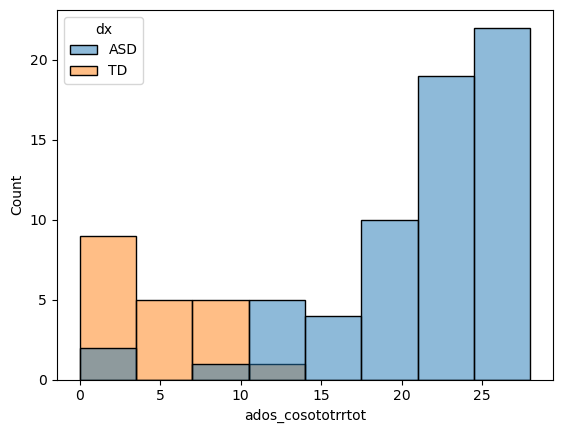

In [40]:
metadata['ados_cosototrrtot'].value_counts().sort_index()
sns.histplot(data=metadata, x='ados_cosototrrtot', hue='dx', kde=False)

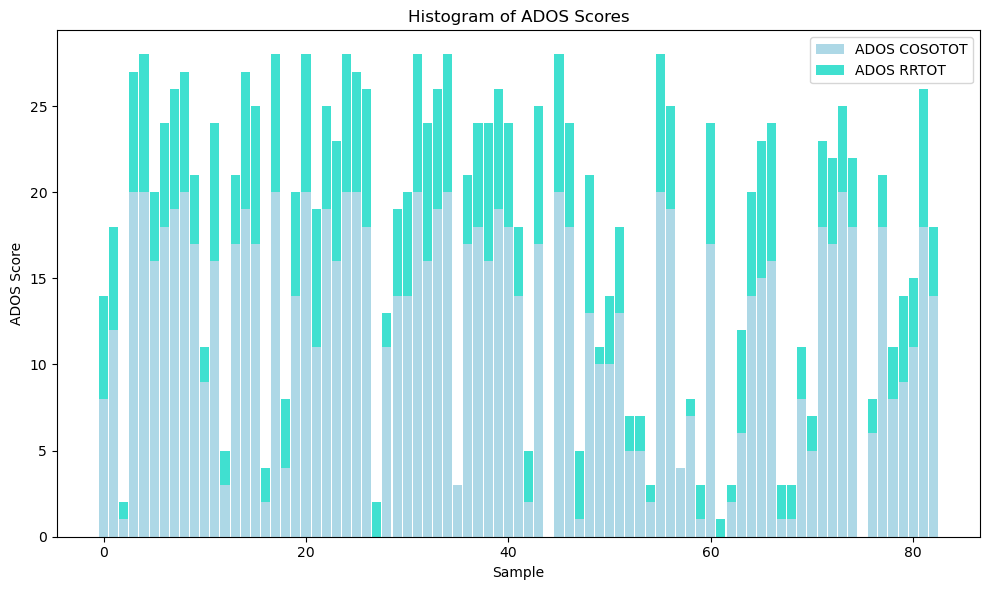

In [42]:
plt.figure(figsize=(10, 6))
width = 0.9
x = range(len(metadata))

plt.bar(x, metadata['ados_cosotot'], width, label='ADOS COSOTOT', color = 'lightblue')
plt.bar(x, metadata['ados_rrtot'], width, bottom=metadata['ados_cosotot'], label='ADOS RRTOT', color = 'turquoise')

plt.title('Histogram of ADOS Scores')
plt.xlabel('Sample')
plt.ylabel('ADOS Score')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Eye-Tracking Plots

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



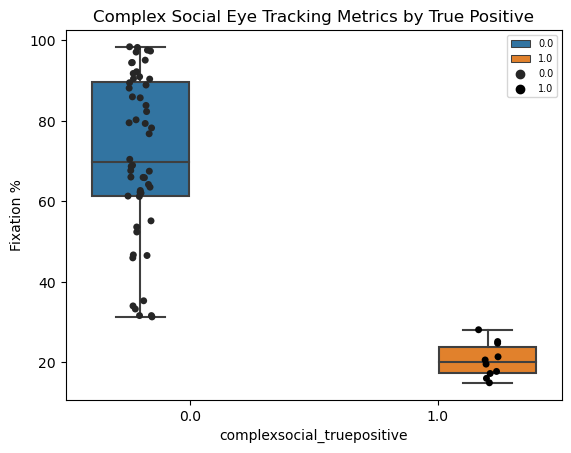

In [43]:
sns.boxplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=metadata, hue='complexsocial_truepositive')
sns.stripplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=metadata, hue='complexsocial_truepositive', dodge=True, jitter=True, color='black') 
plt.title('Complex Social Eye Tracking Metrics by True Positive')
plt.ylabel('Fixation %')
plt.legend(loc='upper right', fontsize = "7")
plt.show()



/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



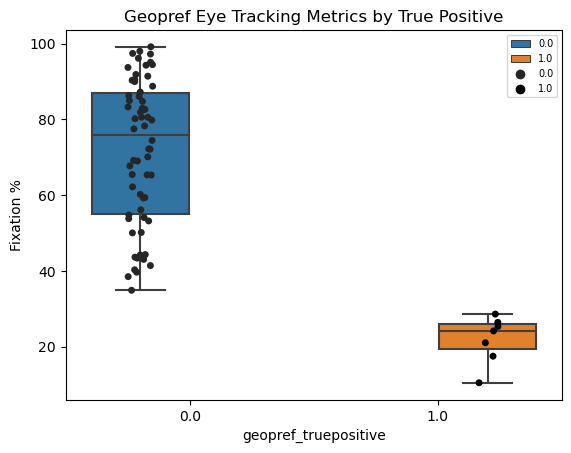

In [44]:
sns.boxplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=metadata, hue='geopref_truepositive')
sns.stripplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=metadata, hue='geopref_truepositive', dodge=True, jitter=True, color='black') 
plt.title('Geopref Eye Tracking Metrics by True Positive')
plt.ylabel('Fixation %')
plt.legend(loc='upper right', fontsize = "7")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



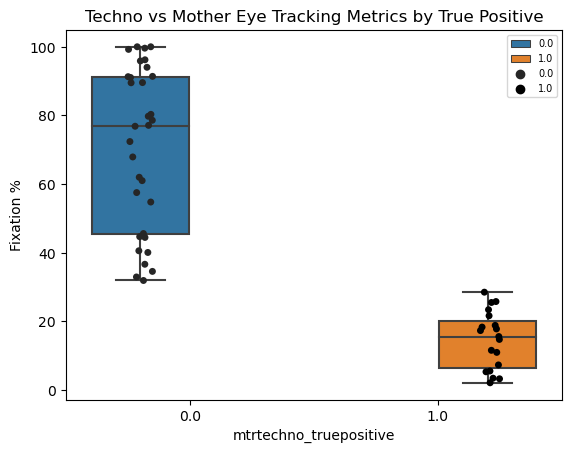

In [45]:
sns.boxplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=metadata, hue='mtrtechno_truepositive')
sns.stripplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=metadata, hue='mtrtechno_truepositive', dodge=True, jitter=True, color='black') 
plt.title('Techno vs Mother Eye Tracking Metrics by True Positive')
plt.ylabel('Fixation %')
plt.legend(loc='upper right', fontsize = "7")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



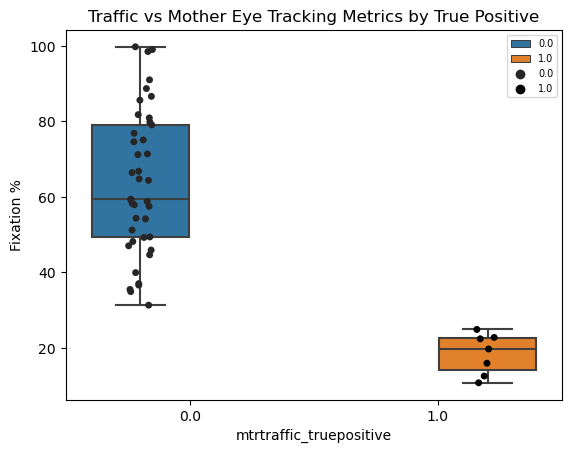

In [46]:
sns.boxplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=metadata, hue='mtrtraffic_truepositive')
sns.stripplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=metadata, hue='mtrtraffic_truepositive', dodge=True, jitter=True, color='black') 
plt.title('Traffic vs Mother Eye Tracking Metrics by True Positive')
plt.ylabel('Fixation %')
plt.legend(loc='upper right', fontsize = "7")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.



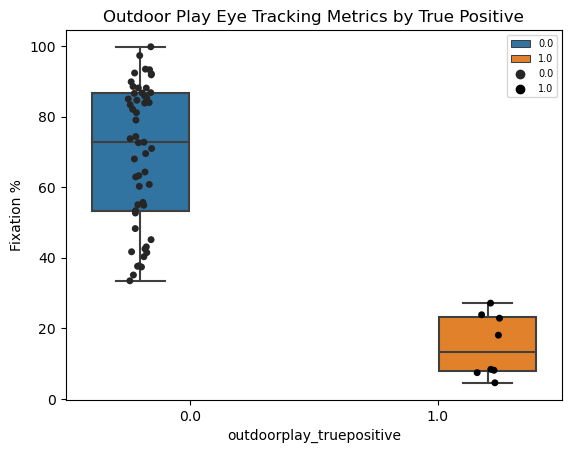

In [47]:
sns.boxplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=metadata, hue='outdoorplay_truepositive')
sns.stripplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=metadata, hue='outdoorplay_truepositive', dodge=True, jitter=True, color='black') 
plt.title('Outdoor Play Eye Tracking Metrics by True Positive')
plt.ylabel('Fixation %')
plt.legend(loc='upper right', fontsize = "7")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.

/opt/homebrew/Caskroom/miniconda/base/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is d

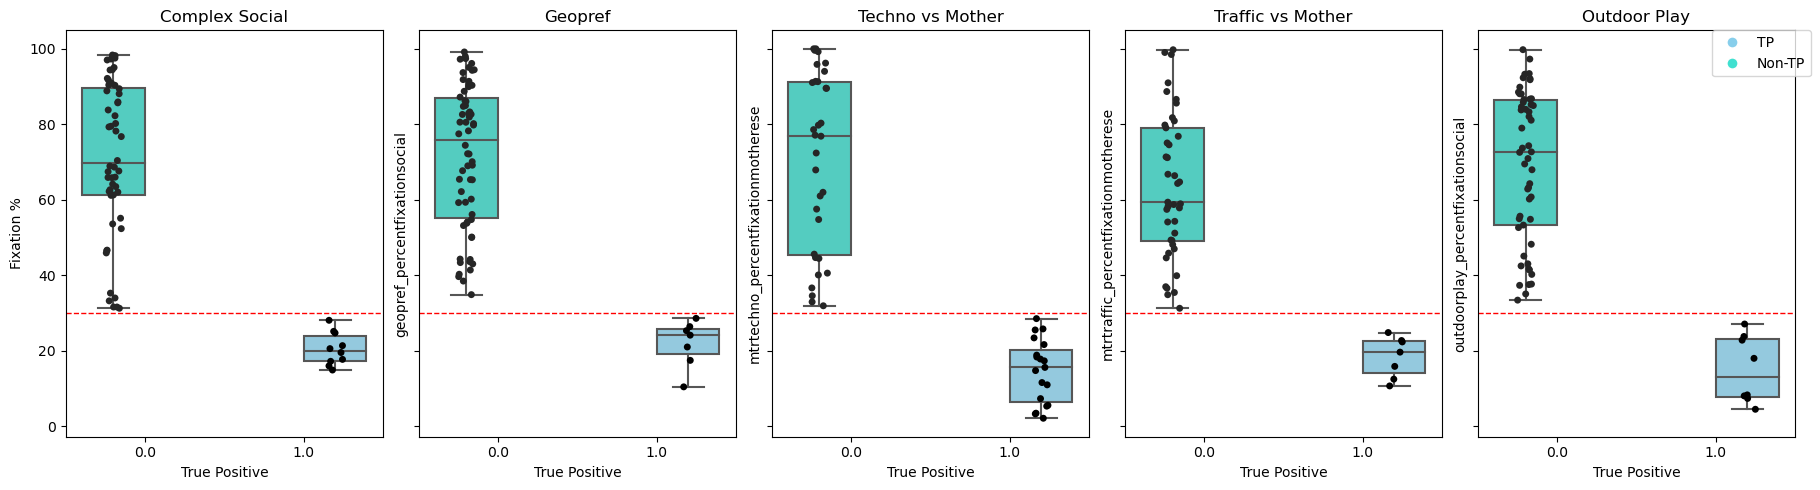

In [48]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Plot 1: Complex Social
sns.boxplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=metadata, hue='complexsocial_truepositive', ax=axes[0], palette=['turquoise', 'skyblue'])
sns.stripplot(x='complexsocial_truepositive', y='complexsocial_percentfixationsocial', data=metadata, hue='complexsocial_truepositive', dodge=True, jitter=True, ax=axes[0], color = 'black')
axes[0].set_title('Complex Social')
axes[0].set_xlabel('True Positive')
axes[0].set_ylabel('Fixation %')
axes[0].legend(loc='upper right', fontsize="7").set_visible(False)
axes[0].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 2: Geopref
sns.boxplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=metadata, hue='geopref_truepositive', ax=axes[1], palette=['turquoise', 'skyblue'])
sns.stripplot(x='geopref_truepositive', y='geopref_percentfixationsocial', data=metadata, hue='geopref_truepositive', dodge=True, jitter=True, ax=axes[1], color = 'black')
axes[1].set_title('Geopref')
axes[1].set_xlabel('True Positive')
axes[1].legend(loc='upper right', fontsize="7").set_visible(False)
axes[1].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 3: Techno vs Mother
sns.boxplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=metadata, hue='mtrtechno_truepositive', ax=axes[2], palette=['turquoise', 'skyblue'])
sns.stripplot(x='mtrtechno_truepositive', y='mtrtechno_percentfixationmotherese', data=metadata, hue='mtrtechno_truepositive', dodge=True, jitter=True, ax=axes[2], color = 'black')
axes[2].set_title('Techno vs Mother')
axes[2].set_xlabel('True Positive')
axes[2].legend(loc='upper right', fontsize="7").set_visible(False)
axes[2].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 4: Traffic vs Mother
sns.boxplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=metadata, hue='mtrtraffic_truepositive', ax=axes[3], palette=['turquoise', 'skyblue'])
sns.stripplot(x='mtrtraffic_truepositive', y='mtrtraffic_percentfixationmotherese', data=metadata, hue='mtrtraffic_truepositive', dodge=True, jitter=True, ax=axes[3], color = 'black')
axes[3].set_title('Traffic vs Mother')
axes[3].set_xlabel('True Positive')
axes[3].legend(loc='upper right', fontsize="7").set_visible(False)
axes[3].axhline(30, color='red', linestyle='--', linewidth=1)

# Plot 5: Outdoor Play
sns.boxplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=metadata, hue='outdoorplay_truepositive', ax=axes[4], palette=['turquoise', 'skyblue'])
sns.stripplot(x='outdoorplay_truepositive', y='outdoorplay_percentfixationsocial', data=metadata, hue='outdoorplay_truepositive', dodge=True, jitter=True, ax=axes[4], color = 'black')
axes[4].set_title('Outdoor Play')
axes[4].set_xlabel('True Positive')
axes[4].legend(loc='upper right', fontsize="7")
axes[4].axhline(30, color='red', linestyle='--', linewidth=1)

# Create custom legend
custom_labels = ['TP', 'Non-TP']
custom_handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=color, markersize=8) for color in ['skyblue', 'turquoise']]
plt.legend(custom_handles, custom_labels, loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(right= 0.9)  # Adjust the right spacing to make room for the legend
plt.show()

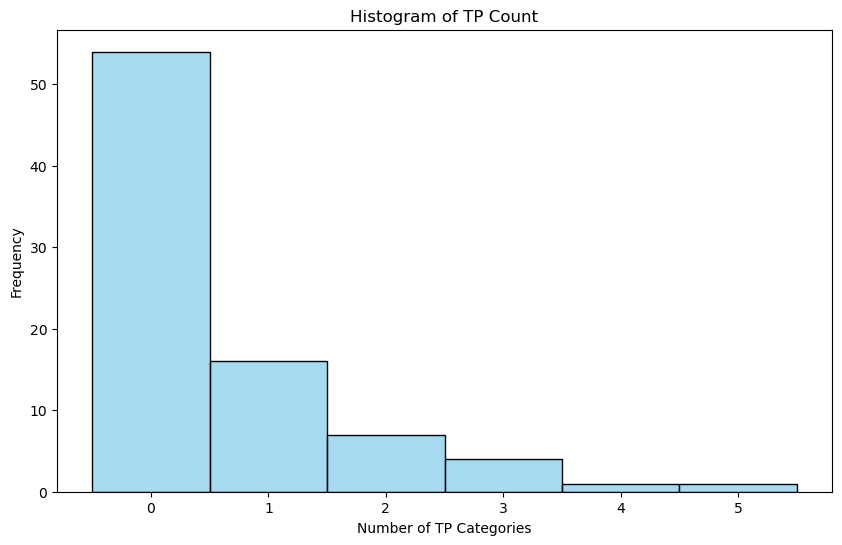

In [49]:
# Create a new DataFrame with the count of TP categories for each sample
df_tp_count = pd.DataFrame({'tp_count': (metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)})

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tp_count, x='tp_count', bins=range(7), discrete=True, kde=False, color = 'skyblue')

# Customize the plot
plt.title('Histogram of TP Count')
plt.xlabel('Number of TP Categories')
plt.ylabel('Frequency')
plt.xticks(range(6), labels=[str(i) for i in range(6)])

plt.show()

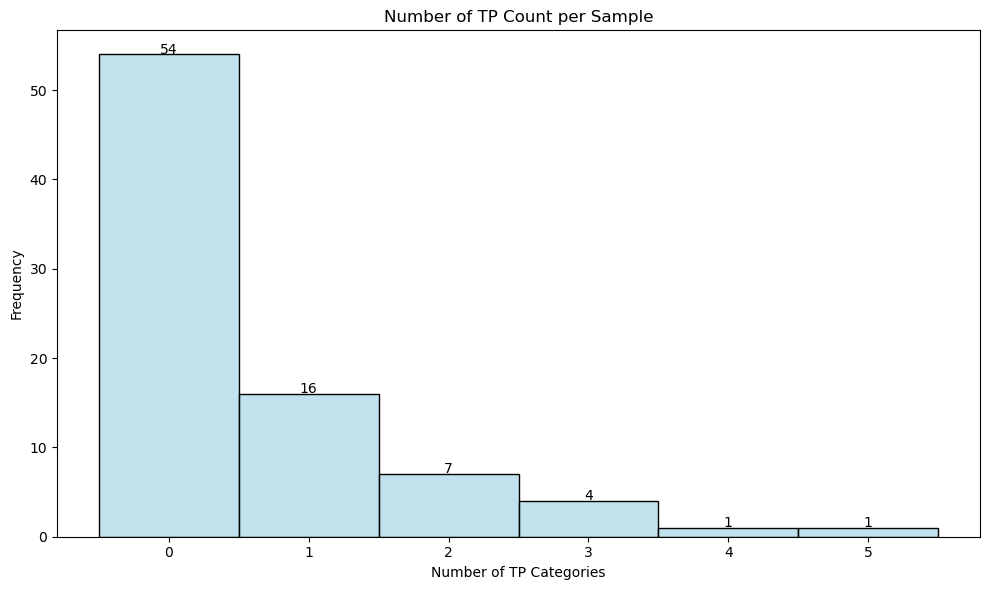

In [50]:
tp_count = pd.DataFrame({'tp_count': (metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)})

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=tp_count, x='tp_count', bins=range(7), discrete=True, kde=False, color = 'lightblue')

# Customize the plot
plt.title('Number of TP Count per Sample')
plt.xlabel('Number of TP Categories')
plt.ylabel('Frequency')
plt.xticks(range(6), labels=[str(i) for i in range(6)])

# Add count annotations above each bin
for i in range(6):
    count = tp_count['tp_count'].value_counts().sort_index()[i]
    ax.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

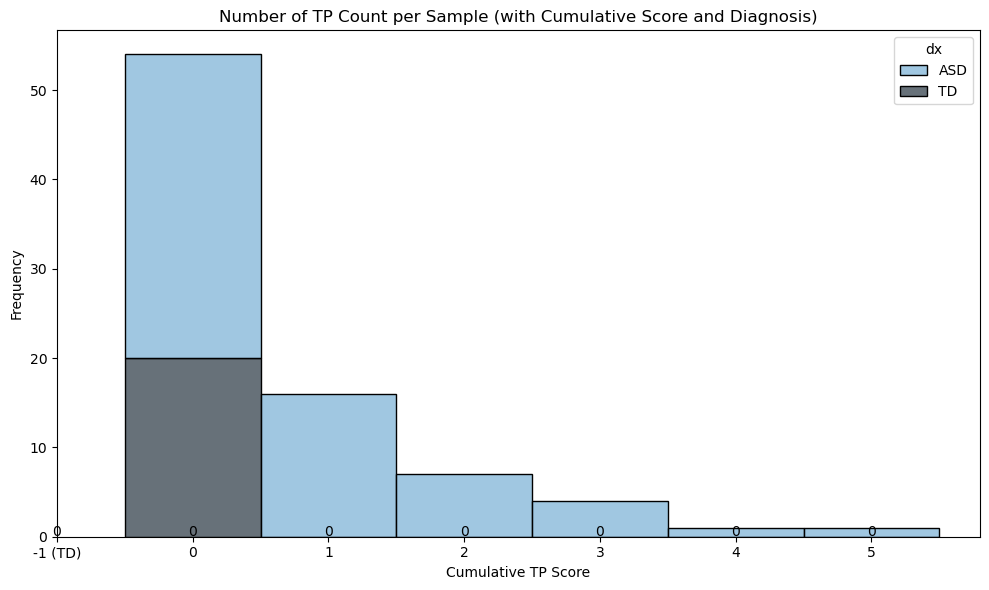

In [56]:
tp_count = pd.DataFrame({'tp_count': (metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)})

# Get the diagnosis from the 'dx' column in metadata
diagnosis = metadata[['dx']]

# Concatenate the diagnosis and tp_count DataFrames
combined_data = pd.concat([diagnosis, tp_count], axis=1)

# Create a new column for the cumulative TP score
def get_cumulative_score(count):
    if count == 0:
        return 0
    elif count >= 1:
        return count
    else:
        return -1

combined_data['cumulative_score'] = combined_data['tp_count'].apply(get_cumulative_score)

# Create the histogram
plt.figure(figsize=(10, 6))
# Get the color palette with increased contrast
color_palette = sns.color_palette(palette='Blues_d', n_colors=10)
color_palette = [color_palette[1], color_palette[9]]
ax = sns.histplot(data=combined_data, x='cumulative_score', hue='dx', bins=range(-2, 7), discrete=True, kde=False, multiple='stack', palette = color_palette)

# Customize the plot
plt.title('Number of TP Count per Sample (with Cumulative Score and Diagnosis)')
plt.xlabel('Cumulative TP Score')
plt.ylabel('Frequency')
plt.xticks(range(-1, 6), labels=['-1 (TD)'] + [str(i) for i in range(6)])

# Add count annotations above each bin
for i in range(-1, 6):
    count_asd = combined_data[(combined_data['cumulative_score'] == i) & (combined_data['dx'] == 1)].shape[0]
    count_td = combined_data[(combined_data['cumulative_score'] == i) & (combined_data['dx'] == 0)].shape[0]
    total_count = count_asd + count_td
    ax.text(i, total_count + 0.1, str(total_count), ha='center')

plt.tight_layout()
plt.savefig('out/cum_tp.png', dpi = 600)
plt.show()

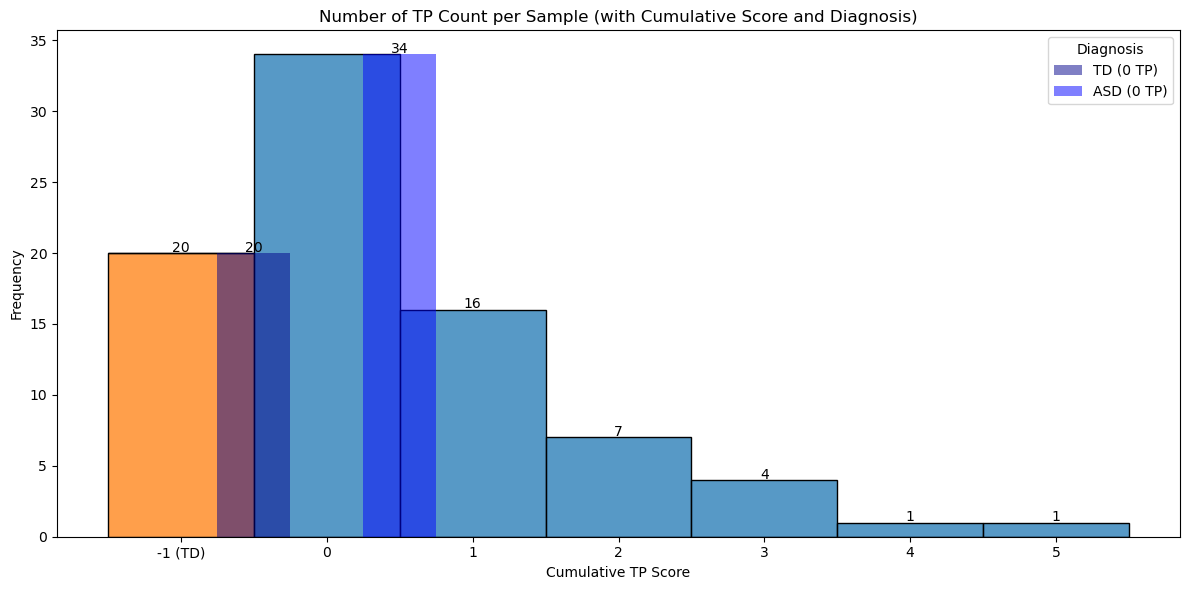

In [58]:
tp_count = pd.DataFrame({'tp_count': (metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)})

# Get the diagnosis from the 'dx' column in metadata
diagnosis = metadata[['dx']]

# Concatenate the diagnosis and tp_count DataFrames
combined_data = pd.concat([diagnosis, tp_count], axis=1)

# Create a new column for the cumulative TP score
def get_cumulative_score(row):
    if row['dx'] == 'TD':
        return -1
    elif row['tp_count'] == 0:
        return 0
    elif row['tp_count'] >= 1:
        return row['tp_count']

combined_data['cumulative_score'] = combined_data.apply(get_cumulative_score, axis=1)

# Create separate columns for TD and ASD samples with 0 TP
combined_data['TD_0_TP'] = ((combined_data['dx'] == 'TD') & (combined_data['tp_count'] == 0)).astype(int)
combined_data['ASD_0_TP'] = ((combined_data['dx'] == 'ASD') & (combined_data['tp_count'] == 0)).astype(int)

# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=combined_data, x='cumulative_score', hue='dx', bins=range(-2, 7), discrete=True, kde=False, multiple='stack')

# Plot TD samples with 0 TP separately
td_0_tp_count = combined_data['TD_0_TP'].sum()
ax.bar(-0.5, td_0_tp_count, width=0.5, color='darkblue', alpha=0.5, label='TD (0 TP)')

# Plot ASD samples with 0 TP separately
asd_0_tp_count = combined_data['ASD_0_TP'].sum()
ax.bar(0.5, asd_0_tp_count, width=0.5, color='blue', alpha=0.5, label='ASD (0 TP)')

# Customize the plot
plt.title('Number of TP Count per Sample (with Cumulative Score and Diagnosis)')
plt.xlabel('Cumulative TP Score')
plt.ylabel('Frequency')
plt.xticks(range(-1, 6), labels=['-1 (TD)'] + [str(i) for i in range(6)])

# Add count annotations above each bin
for i in range(-1, 6):
    if i == 0:
        count_td_0_tp = combined_data['TD_0_TP'].sum()
        count_asd_0_tp = combined_data['ASD_0_TP'].sum()
        ax.text(-0.5, count_td_0_tp + 0.1, str(count_td_0_tp), ha='center')
        ax.text(0.5, count_asd_0_tp + 0.1, str(count_asd_0_tp), ha='center')
    else:
        count = combined_data[(combined_data['cumulative_score'] == i)].shape[0]
        ax.text(i, count + 0.1, str(count), ha='center')

plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

In [59]:
tp_count = pd.DataFrame({'tp_count': (metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']] == 'TP').sum(axis=1)})

# Merge the 'tp_count' DataFrame with the 'metadata' DataFrame
metadata = metadata.merge(tp_count, left_index=True, right_index=True)

# Create a new column for the cumulative TP score
def get_cumulative_score(row):
    if row['dx'] == 'TD':
        return -1
    elif row['tp_count'] == 0:
        return 0
    elif row['tp_count'] >= 1:
        return row['tp_count']
        
metadata['cumulative_tp'] = metadata.apply(get_cumulative_score, axis=1)
print(metadata['cumulative_tp'].value_counts())

metadata.head()



 0    34
-1    20
 1    16
 2     7
 3     4
 5     1
 4     1
Name: cumulative_tp, dtype: int64


,sample_name,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,...,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode,cumulative_tp,tp_count_x,dx_eyetrack,tp_count_y,tp_count_x,tp_count_y,tp_count
0,15350.A5U7C.2,8,14,6,35,X00235506,0,0.0,1,2023-02-08,...,100,103,92026.0,0,0,0,0,0,0,0
1,15350.A6N5R.1,12,18,6,16,X00235660,0,0.0,1,2022-06-28,...,102,99,92154.0,1,1,1,1,1,1,1
2,15350.A6T5B.1,1,2,1,14,X00235600,0,1.0,1,2022-04-18,...,114,101,92102.0,0,0,0,0,0,0,0
3,15350.A7B7Z.1,20,27,7,24,X00235539,1,0.0,1,2022-06-21,...,69,65,91950.0,5,5,1,5,5,5,5
4,15350.A7L6P.1,20,28,8,27,X00235658,0,0.0,1,2022-06-21,...,89,75,91910.0,4,4,1,4,4,4,4


In [60]:
metadata = metadata.drop("tp_count_x", axis = 1)
metadata = metadata.drop("tp_count_y", axis = 1)
metadata.to_csv('data/metadata/Metadata_and_Cumulative_TP.tsv', sep='\t', index =True)

In [61]:

metadata = pd.read_table("data/metadata/Metadata_and_Cumulative_TP.tsv", sep="\t", index_col=0)
# Creating a df that indicates whether the sample is TP in on or more of the eye-tracking metrics.(cumulative-Eye-Tracking-TP)

dx_eyetrack = pd.DataFrame(index=metadata.index)  # Create a new DataFrame with the same index as metadata

dx_eyetrack['dx_eyetrack'] = metadata[['dx_compsocial', 'dx_geopref', 'dx_mtrtechno', 'dx_mtrtraffic', 'dx_outdoorplay']].apply(lambda x: 1 if 'TP' in x.values else 0, axis=1)

dx_eyetrack.to_csv('data/metadata/Dx_Eyetrack.tsv', sep='\t', index =True)
print(dx_eyetrack['dx_eyetrack'].value_counts())

# Joining the dx_eyetrack DataFrame with the fpd DataFrame
metadata_final = metadata.join(dx_eyetrack)
print(metadata_final.head)
metadata_final.to_csv('data/metadata/Metadata_Final.tsv', sep='\t', index =True)


0    54
1    29
Name: dx_eyetrack, dtype: int64


ValueError: columns overlap but no suffix specified: Index(['dx_eyetrack'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


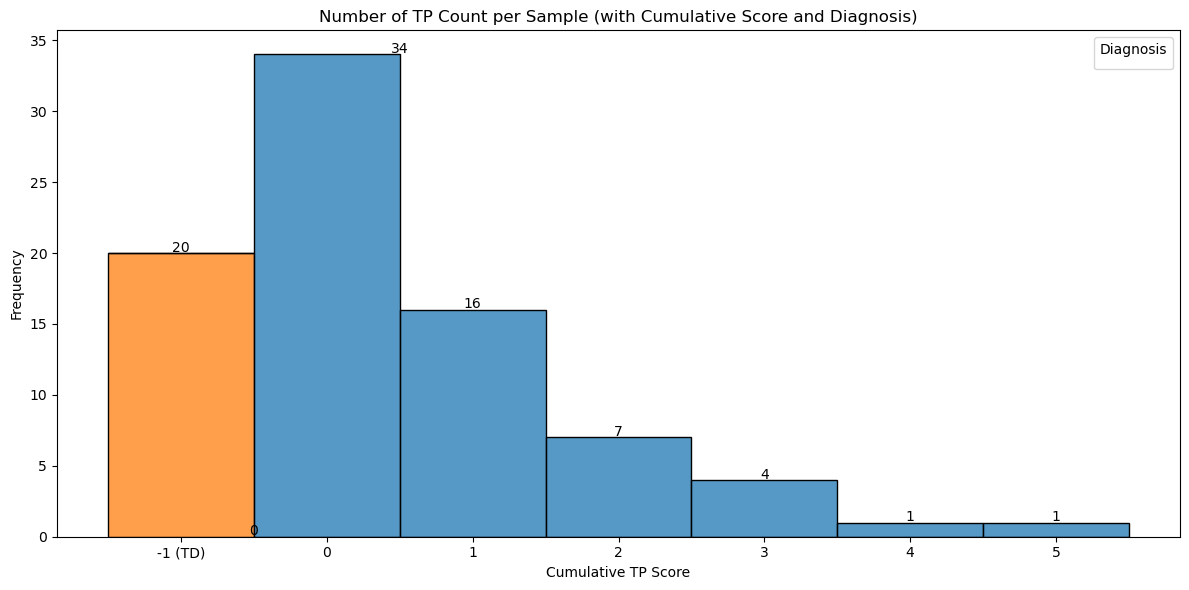

In [62]:
# Create the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=metadata, x='cumulative_tp', hue='dx', bins=range(-2, metadata['cumulative_tp'].max() + 2),
                  discrete=True, kde=False, multiple='stack')

# Customize the plot
plt.title('Number of TP Count per Sample (with Cumulative Score and Diagnosis)')
plt.xlabel('Cumulative TP Score')
plt.ylabel('Frequency')
plt.xticks(range(-1, metadata['cumulative_tp'].max() + 1), labels=['-1 (TD)'] + [str(i) for i in range(metadata['cumulative_tp'].max() + 1)])

# Add count annotations above each bin
for i in range(-1, metadata['cumulative_tp'].max() + 1):
    if i == 0:
        count_td_0_tp = metadata[(metadata['dx'] == 'TD') & (metadata['cumulative_tp'] == 0)].shape[0]
        count_asd_0_tp = metadata[(metadata['dx'] == 'ASD') & (metadata['cumulative_tp'] == 0)].shape[0]
        ax.text(-0.5, count_td_0_tp + 0.1, str(count_td_0_tp), ha='center')
        ax.text(0.5, count_asd_0_tp + 0.1, str(count_asd_0_tp), ha='center')
    else:
        count = metadata[metadata['cumulative_tp'] == i].shape[0]
        ax.text(i, count + 0.1, str(count), ha='center')

plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

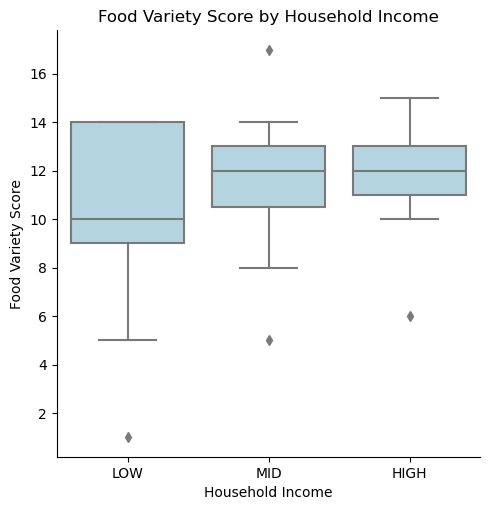

In [63]:
# Create the catplot
sns.catplot(x='household_income_code', y='foodvarietyscore', data=metadata, kind='box', order=['LOW', 'MID', 'HIGH'], color= 'lightblue')

# Set the plot title and labels
plt.title('Food Variety Score by Household Income')
plt.xlabel('Household Income')
plt.ylabel('Food Variety Score')

# Show the plot
plt.show()